In [15]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [16]:
data = pandas.read_excel("mean_data_final.xlsx")
cl=data.columns
X=data[cl[1:len(cl)-1]]
y=data['Rings']
print(X)
print(y)

      Male  Female  Infant  Length  Diameter    Height  Whole_weight  \
0        1       0       0   0.455     0.365  0.095000        0.5140   
1        1       0       0   0.350     0.265  0.090000        0.2255   
2        0       1       0   0.530     0.420  0.135000        0.6770   
3        1       0       0   0.440     0.365  0.125000        0.5160   
4        0       0       1   0.330     0.255  0.080000        0.2050   
...    ...     ...     ...     ...       ...       ...           ...   
4172     0       1       0   0.565     0.450  0.165000        0.8870   
4173     1       0       0   0.590     0.440  0.139719        0.9660   
4174     1       0       0   0.600     0.475  0.205000        1.1760   
4175     0       1       0   0.625     0.485  0.150000        1.0945   
4176     1       0       0   0.710     0.555  0.195000        1.9485   

      Shucked_weight  Viscera_weight  Shell_weight  
0             0.2245        0.101000       0.15000  
1             0.0995        0

In [4]:
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn import model_selection

# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y,  train_size=0.7, test_size=0.3, random_state=123) 
  
# training a linear SVM classifier 
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
print(accuracy)  
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 
print(cm)



0.7679425837320574
[[ 73  74   0   0]
 [ 15 890   0   0]
 [  1 173   0   0]
 [  0  28   0   0]]


In [17]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
accuracy = dtree_model.score(X_test, y_test) 
print(accuracy)
# creating a confusion matrix 
cm = confusion_matrix(y_test, dtree_predictions) 
print(cm)

0.7535885167464115
[[ 90  57   0   0]
 [ 50 855   0   0]
 [  2 172   0   0]
 [  0  28   0   0]]


In [18]:
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 15).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print(accuracy) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions) 
print(cm)

0.7575757575757576
[[ 79  67   1   0]
 [ 32 851  22   0]
 [  0 154  20   0]
 [  0  24   4   0]]


In [19]:
# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 
print(accuracy) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, gnb_predictions) 
print(cm)

0.4569377990430622
[[134  12   0   0   1]
 [162 434  23   0 286]
 [  6  81   5   0  82]
 [  0   8   0   0  20]
 [  0   0   0   0   0]]


In [8]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [9]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [10]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6499202551834131


In [11]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7216905901116427


In [12]:
import numpy as np
print(np.unique(y))
#One Hot Encode our Y:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
Y = encoder.fit_transform(y_train)


[1 2 3 4 5]


In [13]:
# NN
from keras.models import Sequential #Sequential Models
from keras.layers import Dense #Dense Fully Connected Layer Type
from keras.optimizers import SGD #Stochastic Gradient Descent Optimizer

In [14]:
def create_network():
    model = Sequential()
    model.add(Dense(10, input_shape=(10,), activation='relu'))
    model.add(Dense(5, activation='softmax'))
        
    #stochastic gradient descent
    sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [33]:
neural_network = create_network()
neural_network.fit(X_train,Y, epochs=500, batch_size=10)

Epoch 1/500
2923/2923 [==============================] - 1s 227us/step - loss: 0.9972 - accuracy: 0.7085
Epoch 2/500
2923/2923 [==============================] - 0s 165us/step - loss: 0.8334 - accuracy: 0.7290
Epoch 3/500
2923/2923 [==============================] - 0s 163us/step - loss: 0.7853 - accuracy: 0.7290
Epoch 4/500
2923/2923 [==============================] - 1s 192us/step - loss: 0.7514 - accuracy: 0.7290
Epoch 5/500
2923/2923 [==============================] - 1s 195us/step - loss: 0.7263 - accuracy: 0.7290
Epoch 6/500
2923/2923 [==============================] - 1s 196us/step - loss: 0.7080 - accuracy: 0.7297
Epoch 7/500
2923/2923 [==============================] - 1s 198us/step - loss: 0.6951 - accuracy: 0.7338
Epoch 8/500
2923/2923 [==============================] - 1s 190us/step - loss: 0.6840 - accuracy: 0.7496
Epoch 9/500
2923/2923 [==============================] - 1s 172us/step - loss: 0.6776 - accuracy: 0.7503
Epoch 10/500
2923/2923 [==============================]

In [34]:
# Required Python Packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [35]:
# Random forest

from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7862838915470495


In [36]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index = ['Male','Female','Infant','Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight']).sort_values(ascending=False)
feature_imp

Shell_weight      0.195186
Whole_weight      0.152736
Shucked_weight    0.152592
Viscera_weight    0.137421
Diameter          0.114998
Length            0.107839
Height            0.098067
Male              0.015229
Infant            0.013438
Female            0.012492
dtype: float64

No handles with labels found to put in legend.


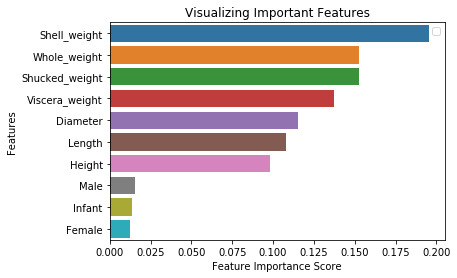

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


In [40]:
# Import train_test_split function
#from sklearn.cross_validation import train_test_split
# Split dataset into features and labels
X1=data[['Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight']]  
y1=data['Rings']                                       
# Split dataset into training set and test set
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1,  train_size=0.7, test_size=0.3, random_state=123)  

In [41]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train1,y_train1)

# prediction on test set
y_pred1=clf.predict(X_test1)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.7791068580542265


In [42]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[  0 147   0   0]
 [  0 905   0   0]
 [  0 174   0   0]
 [  0  28   0   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       147
           2       0.72      1.00      0.84       905
           3       0.00      0.00      0.00       174
           4       0.00      0.00      0.00        28

    accuracy                           0.72      1254
   macro avg       0.18      0.25      0.21      1254
weighted avg       0.52      0.72      0.61      1254



C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [43]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy = svclassifier.score(X_test, y_test) 
print(accuracy)  

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[ 67  80   0   0]
 [ 13 892   0   0]
 [  0 174   0   0]
 [  0  28   0   0]]
              precision    recall  f1-score   support

           1       0.84      0.46      0.59       147
           2       0.76      0.99      0.86       905
           3       0.00      0.00      0.00       174
           4       0.00      0.00      0.00        28

    accuracy                           0.76      1254
   macro avg       0.40      0.36      0.36      1254
weighted avg       0.65      0.76      0.69      1254

0.7647527910685805


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [44]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy = svclassifier.score(X_test, y_test) 
print(accuracy)  

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[ 37 110   0   0]
 [  5 884  16   0]
 [  0 166   8   0]
 [  0  24   4   0]]
              precision    recall  f1-score   support

           1       0.88      0.25      0.39       147
           2       0.75      0.98      0.85       905
           3       0.29      0.05      0.08       174
           4       0.00      0.00      0.00        28

    accuracy                           0.74      1254
   macro avg       0.48      0.32      0.33      1254
weighted avg       0.68      0.74      0.67      1254

0.740829346092504


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
X=data[cl[1:len(cl)-1]]
y=data['Rings']

# Binarize the output
y = label_binarize(y, classes=[1,2,3,4,5])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 4 is present in all training examples.
  str(classes[c]))


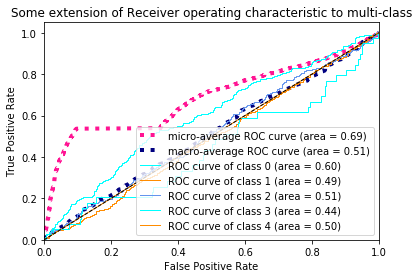

In [48]:
# Compute macro-average ROC curve and ROC area
lw=1
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()